In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("paper_E.csv")

In [4]:
df.shape

(300, 12)

In [3]:
df.head()

,customer_id,age,gender,platform,annual_income,visits_per_month,avg_session_time,past_purchases,discount_usage,noise_score,customer_spending,high_spender
0,C0001,55.0,Female,Mobile,49285,5,23.1,88,0.13,0.08,3070.0,0
1,C0002,45.0,Female,Store,62626,23,12.4,72,0.40,0.38,3954.0,0
2,C0003,31.0,Female,Web,67808,1,16.7,11,0.24,0.32,2243.0,0
3,C0004,59.0,Male,Web,113464,4,13.7,64,0.39,0.59,3970.0,0
4,C0005,24.0,Female,Web,78871,22,15.7,77,0.06,0.07,3429.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        300 non-null    object 
 1   age                292 non-null    float64
 2   gender             300 non-null    object 
 3   platform           300 non-null    object 
 4   annual_income      300 non-null    int64  
 5   visits_per_month   300 non-null    int64  
 6   avg_session_time   300 non-null    float64
 7   past_purchases     300 non-null    int64  
 8   discount_usage     300 non-null    float64
 9   noise_score        300 non-null    float64
 10  customer_spending  300 non-null    float64
 11  high_spender       300 non-null    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 28.3+ KB


In [6]:
df.describe()

,age,annual_income,visits_per_month,avg_session_time,past_purchases,discount_usage,noise_score,customer_spending,high_spender
count,292.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.965753,70146.453333,12.803333,20.750333,48.926667,0.296733,0.348400,2869.033333,0.070000
std,13.520210,29293.970516,7.203538,8.915371,28.723593,0.172216,0.200224,1079.432440,0.255573
min,18.000000,25055.000000,1.000000,5.200000,1.000000,0.000000,0.000000,398.000000,0.000000
25%,30.000000,43525.750000,6.750000,12.800000,25.750000,0.140000,0.180000,2072.000000,0.000000
50%,41.000000,68154.500000,13.000000,21.750000,47.000000,0.300000,0.360000,2751.500000,0.000000
75%,52.250000,98374.250000,19.000000,28.450000,75.250000,0.440000,0.520000,3665.500000,0.000000
max,64.000000,119456.000000,24.000000,34.900000,99.000000,0.600000,0.700000,6057.000000,1.000000


In [7]:
df.columns

Index(['customer_id', 'age', 'gender', 'platform', 'annual_income',
       'visits_per_month', 'avg_session_time', 'past_purchases',
       'discount_usage', 'noise_score', 'customer_spending', 'high_spender'],
      dtype='object')

In [8]:
df.isnull().sum()

customer_id          0
age                  8
gender               0
platform             0
annual_income        0
visits_per_month     0
avg_session_time     0
past_purchases       0
discount_usage       0
noise_score          0
customer_spending    0
high_spender         0
dtype: int64

In [9]:
df['age']=df['age'].fillna(df['age'].median())

In [11]:
df.dtypes

customer_id           object
age                  float64
gender                object
platform              object
annual_income          int64
visits_per_month       int64
avg_session_time     float64
past_purchases         int64
discount_usage       float64
noise_score          float64
customer_spending    float64
high_spender           int64
dtype: object

In [12]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['gender']=df['gender'].map({'Female' : 1, 
                               'Male' : 0})

In [14]:
df['platform'].unique()

array(['Mobile', 'Store', 'Web'], dtype=object)

In [15]:
df = pd.get_dummies(df, columns=['platform'], prefix='platform', drop_first=False, dtype=int)


In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

In [17]:
df.head()

,customer_id,age,gender,annual_income,visits_per_month,avg_session_time,past_purchases,discount_usage,noise_score,customer_spending,high_spender,platform_Mobile,platform_Store,platform_Web
0,C0001,55.0,1,49285,5,23.1,88,0.13,0.08,3070.0,0,1,0,0
1,C0002,45.0,1,62626,23,12.4,72,0.40,0.38,3954.0,0,0,1,0
2,C0003,31.0,1,67808,1,16.7,11,0.24,0.32,2243.0,0,0,0,1
3,C0004,59.0,0,113464,4,13.7,64,0.39,0.59,3970.0,0,0,0,1
4,C0005,24.0,1,78871,22,15.7,77,0.06,0.07,3429.0,0,0,0,1


In [19]:
df.drop(columns='customer_id', inplace=True)

In [20]:
df.columns

Index(['age', 'gender', 'annual_income', 'visits_per_month',
       'avg_session_time', 'past_purchases', 'discount_usage', 'noise_score',
       'customer_spending', 'high_spender', 'platform_Mobile',
       'platform_Store', 'platform_Web'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
x_li=df.drop('customer_spending', axis=1)
y_li=df['customer_spending']

In [27]:
x_train_li, x_test_li, y_train_li, y_test_li=train_test_split(x_li, y_li, test_size=0.2, random_state=42)

In [30]:
scaler=StandardScaler()
x_train_li=scaler.fit_transform(x_train_li)
x_test_li=scaler.transform(x_test_li)

In [31]:
li=LinearRegression()
li.fit(x_train_li, y_train_li)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred_li=li.predict(x_test_li)

In [34]:
print(r2_score(y_test_li, y_pred_li))
print(mean_squared_error(y_test_li, y_pred_li))

0.8706628414772208
179262.91451101183


In [36]:
df.columns

Index(['age', 'gender', 'annual_income', 'visits_per_month',
       'avg_session_time', 'past_purchases', 'discount_usage', 'noise_score',
       'customer_spending', 'high_spender', 'platform_Mobile',
       'platform_Store', 'platform_Web'],
      dtype='object')

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
x_lo=df.drop(['high_spender', 'customer_spending'], axis=1)
y_lo=df['high_spender']

In [52]:
x_train_lo, x_test_lo, y_train_lo, y_test_lo=train_test_split(x_lo, y_lo, test_size=0.2, random_state=42)

In [ ]:
lo=LogisticRegression(max_iter=10000)
lo.fit(x_train_lo, y_train_lo)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [54]:
y_pred_lo=lo.predict(x_test_lo)

In [55]:
acc=accuracy_score(y_test_lo, y_pred_lo)
cm=confusion_matrix(y_test_lo, y_pred_lo)
cr=classification_report(y_test_lo, y_pred_lo)
print(acc)
print(cm)
print(cr)

0.95
[[55  2]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        57
           1       0.50      0.67      0.57         3

    accuracy                           0.95        60
   macro avg       0.74      0.82      0.77        60
weighted avg       0.96      0.95      0.95        60



In [56]:
x_nb=df.drop(['high_spender', 'customer_spending'], axis=1)
y_nb=df['high_spender']

In [57]:
x_train_nb, x_test_nb, y_train_nb, y_test_nb=train_test_split(x_nb, y_nb, test_size=0.2, random_state=42)

In [58]:
nb=MultinomialNB()
nb.fit(x_train_nb, y_train_nb)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [59]:
y_pred_nb= nb.predict(x_test_nb)

In [60]:
print("Accuracy:", accuracy_score(y_test_nb, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_nb, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test_nb, y_pred_nb))

Accuracy: 0.7166666666666667

Confusion Matrix:
 [[40 17]
 [ 0  3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        57
           1       0.15      1.00      0.26         3

    accuracy                           0.72        60
   macro avg       0.57      0.85      0.54        60
weighted avg       0.96      0.72      0.80        60



In [61]:
x_n=df.drop(['high_spender', 'customer_spending'], axis=1)
y_n=df['high_spender']

In [62]:
x_train_n, x_test_n, y_train_n, y_test_n=train_test_split(x_n, y_n, test_size=0.2, random_state=42)

In [63]:
n=KNeighborsClassifier(n_neighbors=3)
n.fit(x_train_n, y_train_n)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [66]:
y_pred_n= n.predict(x_test_n)

In [67]:
print("Accuracy:", accuracy_score(y_test_n, y_pred_n))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_n, y_pred_n))
print("\nClassification Report:\n", classification_report(y_test_n, y_pred_n))

Accuracy: 0.9166666666666666

Confusion Matrix:
 [[54  3]
 [ 2  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        57
           1       0.25      0.33      0.29         3

    accuracy                           0.92        60
   macro avg       0.61      0.64      0.62        60
weighted avg       0.93      0.92      0.92        60



In [ ]:
x_s=df.drop(['high_spender', 'customer_spending'], axis=1)
y_s=df['high_spender']

In [69]:
x_train_s, x_test_s, y_train_s, y_test_s=train_test_split(x_s, y_s, test_size=0.2, random_state=42)

In [70]:
s=SVC(kernel='linear')
s.fit(x_train_s, y_train_s)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [73]:
y_pred_s= s.predict(x_test_s)

In [74]:
print("Accuracy:", accuracy_score(y_test_s, y_pred_s))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_s, y_pred_s))
print("\nClassification Report:\n", classification_report(y_test_s, y_pred_s))

Accuracy: 0.95

Confusion Matrix:
 [[55  2]
 [ 1  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        57
           1       0.50      0.67      0.57         3

    accuracy                           0.95        60
   macro avg       0.74      0.82      0.77        60
weighted avg       0.96      0.95      0.95        60



In [75]:
x_d=df.drop(['high_spender', 'customer_spending'], axis=1)
y_d=df['high_spender']

In [76]:
x_train_d, x_test_d, y_train_d, y_test_d=train_test_split(x_d, y_d, test_size=0.2, random_state=42)

In [77]:
d=DecisionTreeClassifier(max_depth=5)
d.fit(x_train_d, y_train_d)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
y_pred_d= d.predict(x_test_d)

In [79]:
print("Accuracy:", accuracy_score(y_test_d, y_pred_d))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_d, y_pred_d))
print("\nClassification Report:\n", classification_report(y_test_d, y_pred_d))

Accuracy: 0.9

Confusion Matrix:
 [[54  3]
 [ 3  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        57
           1       0.00      0.00      0.00         3

    accuracy                           0.90        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.90      0.90      0.90        60



In [80]:
x_rf=df.drop(['customer_spending', 'high_spender'], axis=1)
y_rf=df['high_spender']

In [81]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf= train_test_split(x_rf, y_rf, test_size=0.3, random_state=42)

In [83]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_rf, y_train_rf)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
y_pred_rf=rf.predict(x_test_rf)

In [85]:
print("Accuracy",accuracy_score(y_test_rf, y_pred_rf))
print("Classification Report: \n", classification_report(y_test_rf, y_pred_rf))
print("Confusion matrix: \n", confusion_matrix(y_test_rf, y_pred_rf))

Accuracy 0.9333333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        84
           1       0.00      0.00      0.00         6

    accuracy                           0.93        90
   macro avg       0.47      0.50      0.48        90
weighted avg       0.87      0.93      0.90        90

Confusion matrix: 
 [[84  0]
 [ 6  0]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Lenovo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Lenovo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

In [ ]:
from sklearn.tensorflow.keras.model import Sequential
from sklearn.tensorflow.keras.layers import Dense, dropout

In [ ]:
x=df.drop(['customer_spending', 'high_spender'], axis=1)
y_=df['high_spender']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    x_train,
    y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

In [87]:
df.columns

Index(['age', 'gender', 'annual_income', 'visits_per_month',
       'avg_session_time', 'past_purchases', 'discount_usage', 'noise_score',
       'customer_spending', 'high_spender', 'platform_Mobile',
       'platform_Store', 'platform_Web'],
      dtype='object')

In [88]:
x=df[['annual_income', 'visits_per_month',
       'avg_session_time', 'past_purchases']]

In [91]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(x)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


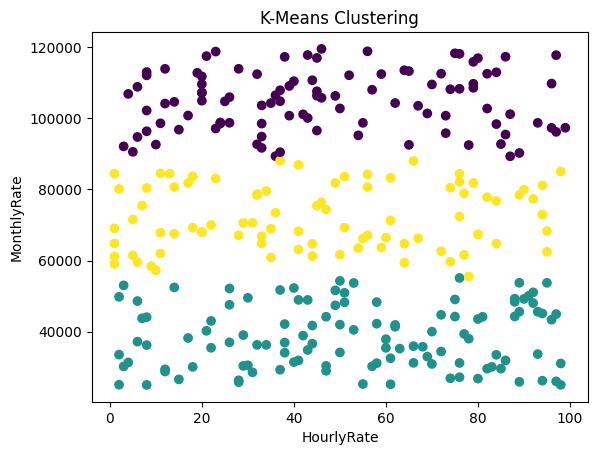

In [93]:
df["Cluster"] = km.labels_
plt.scatter(x["past_purchases"], x["annual_income"], c=df["Cluster"])
plt.xlabel("HourlyRate")
plt.ylabel("MonthlyRate")
plt.title("K-Means Clustering")
plt.show()